## Individual Assignment 1 - End-to-End Machine Learning Project

Submitted by: Jared Balakrishnan

INSY695-078: Enterprise Data Science and Machine Learning in Production I
Winter 2024
Dr. Fatih Nayebi

January 19, 2024

In [604]:
import sys 

assert sys.version_info >= (3, 7)

In [605]:
from packaging import version 
import sklearn 
import numpy as np

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [606]:
# Reading in the dataset

from pathlib import Path 
import pandas as pd 
import matplotlib.pyplot as plt 

dataset_path: Path = Path().absolute() / "datasets"

def read_dataset(file_path: Path) -> pd.DataFrame:

    """ Reading in a .csv file and returning a pandas dataframe containing the dataset """

    return pd.read_csv(file_path, encoding = 'unicode_escape')

In [607]:
nyc_bnbs = read_dataset(dataset_path / "new_york_listings_2024.csv")

## Taking a Quick Look at the Data Structure

In [608]:
nyc_bnbs.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn Â· â 5.0 Â· 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York Â· â 4.67 Â· 2 bedroo...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York Â· â 4.17 Â· 1 bedroo...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York Â· â 4.64 Â· 1 bedroo...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York Â· â 4.91 Â· Studio Â· 1 be...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [609]:
# removing some unneccessary columns

nyc_bnbs.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review'], axis = 1, inplace = True)

nyc_bnbs['bedrooms'] = nyc_bnbs['bedrooms'].replace('Studio', 0)
nyc_bnbs['baths'] = nyc_bnbs['baths'].replace('Not specified', np.nan)


In [610]:
nyc_bnbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             20758 non-null  object 
 1   latitude                        20758 non-null  float64
 2   longitude                       20758 non-null  float64
 3   room_type                       20758 non-null  object 
 4   price                           20758 non-null  float64
 5   minimum_nights                  20758 non-null  int64  
 6   number_of_reviews               20758 non-null  int64  
 7   reviews_per_month               20758 non-null  float64
 8   calculated_host_listings_count  20758 non-null  int64  
 9   availability_365                20758 non-null  int64  
 10  number_of_reviews_ltm           20758 non-null  int64  
 11  license                         20758 non-null  object 
 12  rating                          

In [611]:
# implementing type conversions since 
# rating, bedrooms and baths should be numeric

nyc_bnbs['rating'] = pd.to_numeric(nyc_bnbs['rating'], errors='coerce')
nyc_bnbs['bedrooms'] = pd.to_numeric(nyc_bnbs['bedrooms'], errors='coerce')
nyc_bnbs['baths'] = pd.to_numeric(nyc_bnbs['baths'], errors='coerce')



In [612]:
nyc_bnbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             20758 non-null  object 
 1   latitude                        20758 non-null  float64
 2   longitude                       20758 non-null  float64
 3   room_type                       20758 non-null  object 
 4   price                           20758 non-null  float64
 5   minimum_nights                  20758 non-null  int64  
 6   number_of_reviews               20758 non-null  int64  
 7   reviews_per_month               20758 non-null  float64
 8   calculated_host_listings_count  20758 non-null  int64  
 9   availability_365                20758 non-null  int64  
 10  number_of_reviews_ltm           20758 non-null  int64  
 11  license                         20758 non-null  object 
 12  rating                          

In [613]:
nyc_bnbs['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        8038
Brooklyn         7719
Queens           3761
Bronx             949
Staten Island     291
Name: count, dtype: int64

In [614]:
nyc_bnbs['room_type'].value_counts()

room_type
Entire home/apt    11549
Private room        8804
Shared room          293
Hotel room           112
Name: count, dtype: int64

In [615]:
nyc_bnbs['license'].value_counts()

license
No License            17569
Exempt                 2135
OSE-STRREG-0000068       14
OSE-STRREG-0008664        6
OSE-STRREG-0000437        6
                      ...  
OSE-STRREG-0000131        1
OSE-STRREG-0000288        1
OSE-STRREG-0000215        1
OSE-STRREG-0000985        1
OSE-STRREG-0000513        1
Name: count, Length: 879, dtype: int64

In [616]:
nyc_bnbs.loc[~nyc_bnbs['license'].isin(['No License', 'Exempt']), 'license'] = 'Licensed'


In [617]:
nyc_bnbs.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,baths
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,17006.000000,20758.000000,20758.000000,20745.000000
mean,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,4.734253,1.306725,1.723721,1.177995
std,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,0.294387,0.877419,1.212272,0.480456
min,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.750000,0.000000,1.000000,0.000000
25%,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,4.640000,1.000000,1.000000,1.000000
50%,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,4.810000,1.000000,1.000000,1.000000
75%,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,4.930000,2.000000,2.000000,1.000000
max,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,5.000000,15.000000,42.000000,15.500000


### Setting up the folder to which images are to be saved

In [618]:
IMAGES_PATH: Path = Path().absolute() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents = True, exist_ok = True)

def save_fig (fig_id, tight_layout = True, fig_extension: str = "png", resolution: int = 300) -> None:

    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"

    if tight_layout:
        plt.tight_layout()
    
    plt.savefig(path, format = fig_extension, dpi = resolution)

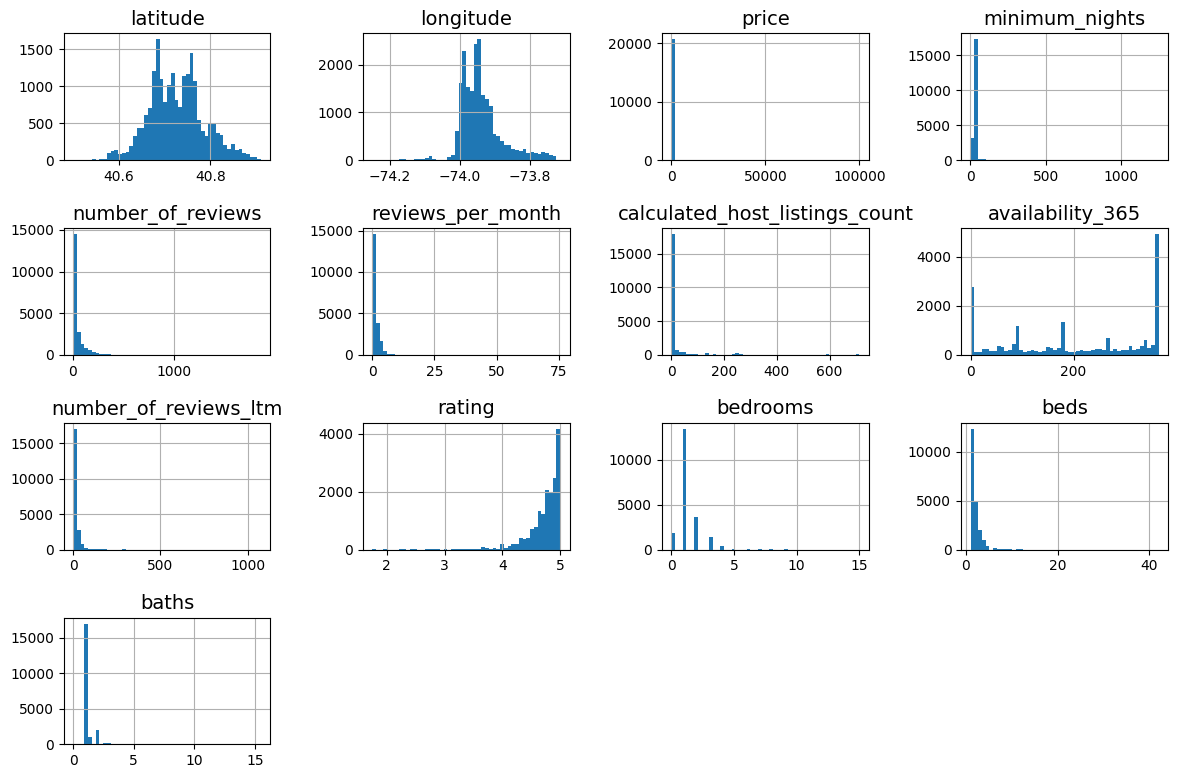

In [619]:
plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

nyc_bnbs.hist(bins = 50, figsize = (12, 8))

save_fig("attribute_histogram_plots")
plt.show()

## Creating a Test Dataset

In [620]:
import numpy as np 

def shuffle_and_split_data (data: pd.DataFrame, test_ratio: float) -> tuple[pd.DataFrame, pd.DataFrame]:

    shuffled_indices: list[int] = np.random.permutation(len(data)).tolist()

    test_set_size: int = int(len(data) * test_ratio)

    test_indices: list[int] = shuffled_indices[:test_set_size]
    train_indices: list[int] = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]


In [621]:
train_set, test_set = shuffle_and_split_data(nyc_bnbs, 0.2)

In [622]:
print(f"Number of instances in test set: {len(test_set)}")
print(f"Number of instances in training set: {len(train_set)}")

Number of instances in test set: 4151
Number of instances in training set: 16607


In [623]:
# Setting random seed to ensure reproducibility

np.random.seed(42)

In [624]:
# from zlib import crc32

# def is_id_in_test_set(identifier, test_ratio):

#     return crc32(np.int64(identifier)) < test_ratio * 2**32

# def split_data_with_id_hash(data, test_ration, id_column):

#     ids = data[id_column]
#     in_test_set = ids.apply(lambda x: is_id_in_test_set(x, test_ratio))

#     return data.loc[~in_test_set], data.loc[in_test_set]

# seoul_biking_with_ids = seoul_biking.reset_index(inplace = True)

# train_test, test_set = split_data_with_id_hash(seoul_biking_with_ids, 0.2, "index")

In [625]:
from sklearn.model_selection import train_test_split 

train_test, test_set = train_test_split(nyc_bnbs, test_size = 0.2, random_state = 42)

test_set['price'].isnull().sum()

0

In [626]:
nyc_bnbs["bedroom_cat"] = pd.cut(nyc_bnbs["bedrooms"],
                                    bins = [0, 1, 3, 4, 6, np.inf],
                                   labels = [1, 2, 3, 4, 5], include_lowest = True)

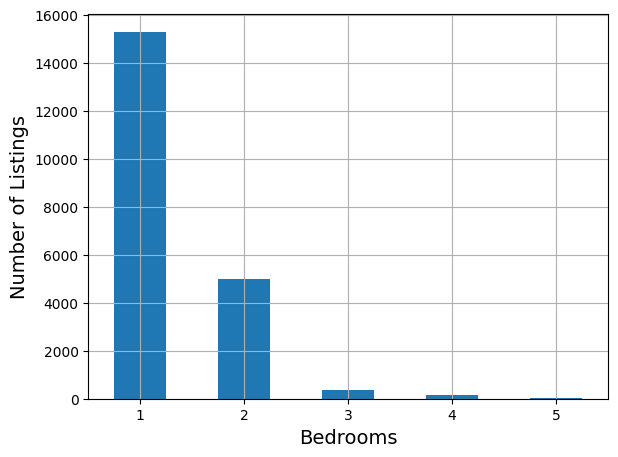

In [627]:
nyc_bnbs["bedroom_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Bedrooms")
plt.ylabel("Number of Listings")
save_fig("airbnb_listings_by_bedroom")  # extra code
plt.show()

In [630]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(nyc_bnbs, nyc_bnbs["bedroom_cat"]):
    strat_train_set_n = nyc_bnbs.iloc[train_index]
    strat_test_set_n = nyc_bnbs.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [631]:
strat_train_set, strat_test_set = strat_splits[0]

In [632]:
# much shorter to get a single stratified split:
strat_train_set, strat_test_set = train_test_split(
    nyc_bnbs, test_size=0.2, stratify=nyc_bnbs["bedroom_cat"], random_state=42)

In [633]:
strat_test_set["bedroom_cat"].value_counts() / len(strat_test_set)

bedroom_cat
1    0.734827
2    0.240607
3    0.016618
4    0.006744
5    0.001204
Name: count, dtype: float64

In [634]:
# extra code – computes the data for Figure 2–10

def bedroom_category_proportions(data: pd.DataFrame):
    return data["bedroom_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(nyc_bnbs, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": bedroom_category_proportions(nyc_bnbs),
    "Stratified %": bedroom_category_proportions(strat_test_set),
    "Random %": bedroom_category_proportions(test_set),
}).sort_index()
compare_props.index.name = "Bedroom Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Bedroom Category,,,,,
1,73.48,73.48,73.60,-0.00,0.16
2,24.07,24.06,24.18,-0.03,0.47
3,1.66,1.66,1.35,-0.01,-18.85
4,0.68,0.67,0.79,-0.72,17.01
5,0.11,0.12,0.07,13.63,-31.82


In [635]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("bedroom_cat", axis=1, inplace=True)

In [638]:
# geographic visualizations
nyc_bnbs = strat_train_set.copy()

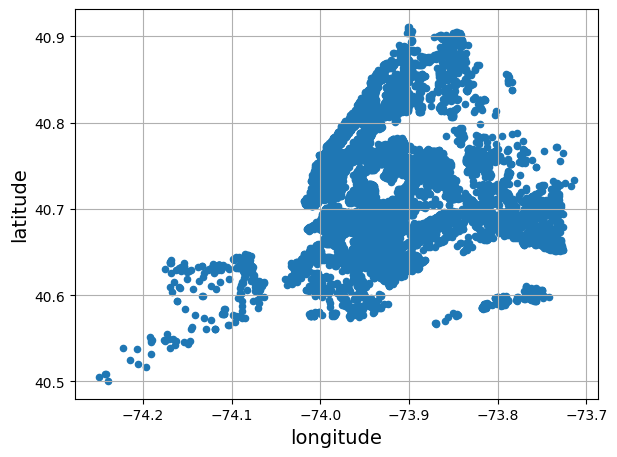

In [639]:
nyc_bnbs.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True)
save_fig("bad_visualization_plot")
plt.show()

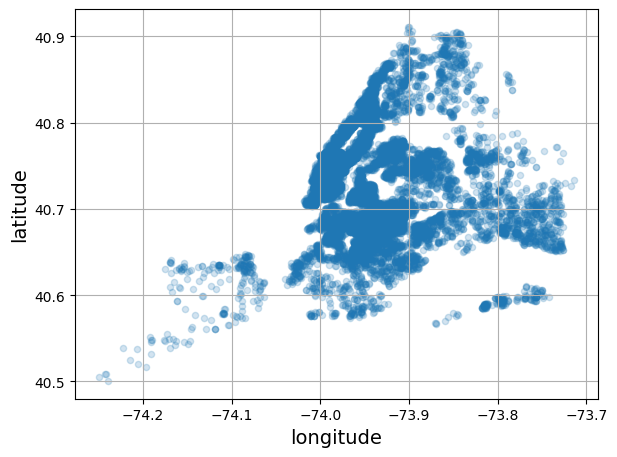

In [640]:
nyc_bnbs.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

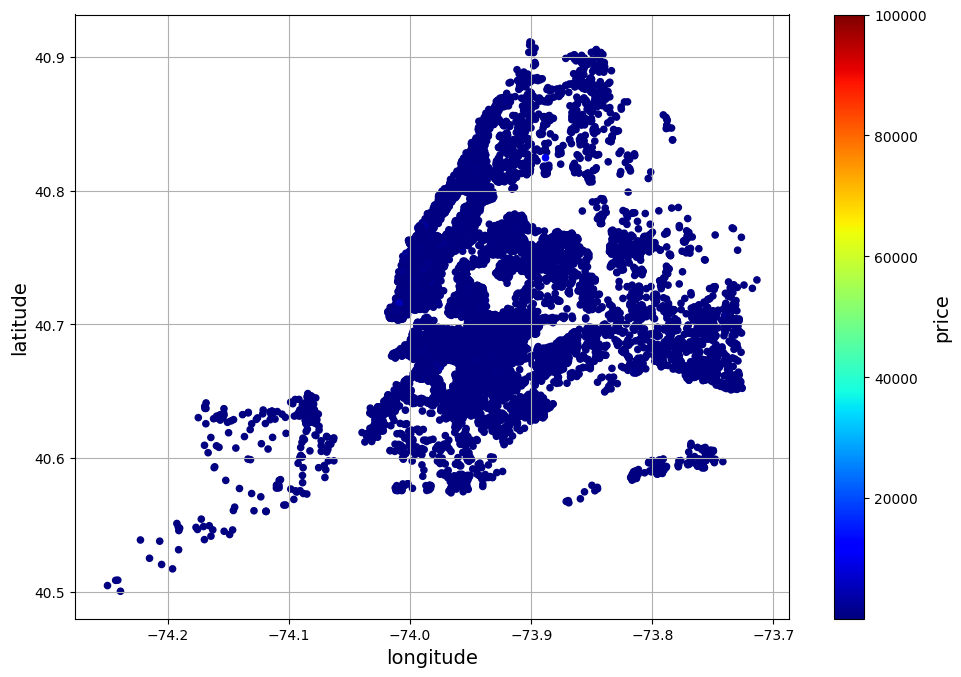

In [641]:
nyc_bnbs.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             c="price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

In [642]:
# Looking for Correlations

corr_matrix = nyc_bnbs.corr(numeric_only = True)

In [643]:
corr_matrix['price'].sort_values(ascending = False)

price                             1.000000
bedrooms                          0.083469
beds                              0.081517
baths                             0.080317
availability_365                  0.019491
rating                            0.002939
latitude                          0.001268
minimum_nights                   -0.007781
calculated_host_listings_count   -0.008188
reviews_per_month                -0.010332
number_of_reviews                -0.013787
number_of_reviews_ltm            -0.013952
longitude                        -0.040822
Name: price, dtype: float64

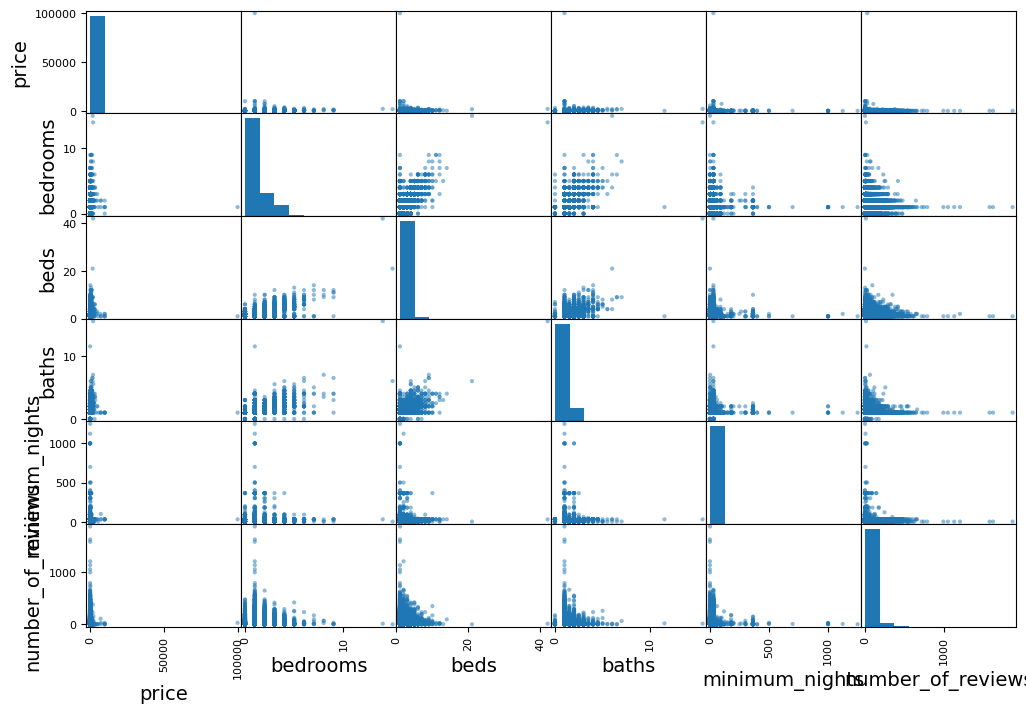

In [644]:
from pandas.plotting import scatter_matrix 

attributes = ['price', 'bedrooms', 'beds', 'baths', 'minimum_nights', 'number_of_reviews']

scatter_matrix(nyc_bnbs[attributes], figsize = (12, 8))
# save_fig("scatter_matrix_plot")
plt.show()

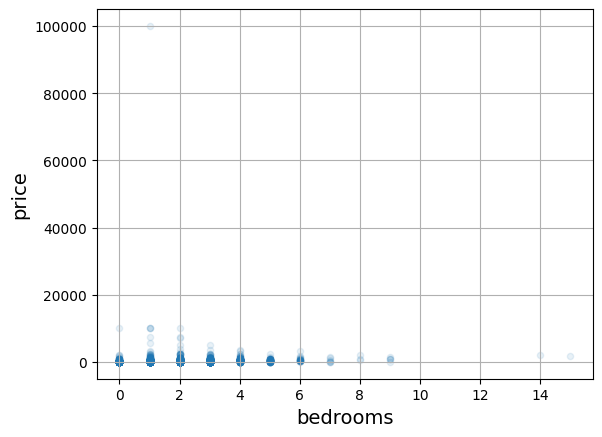

In [645]:
nyc_bnbs.plot(kind="scatter", x="bedrooms", y="price",
             alpha=0.1, grid=True)
#save_fig("Ridership vs Time of Day")  # extra code
plt.show()

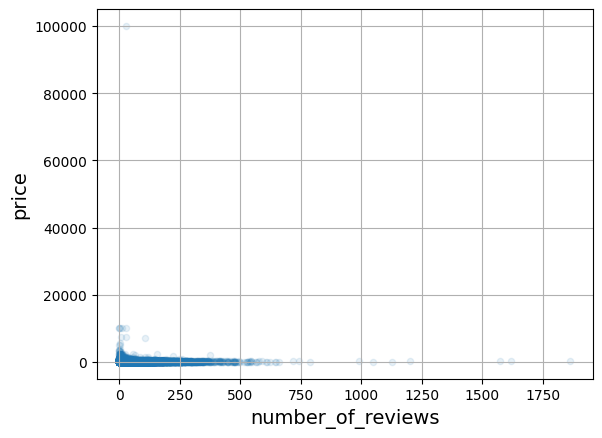

In [646]:
nyc_bnbs.plot(kind="scatter", x = "number_of_reviews", y = "price",
             alpha=0.1, grid=True)
#save_fig("Ridership vs Temperature")  # extra code
plt.show()

In [647]:
# Experimenting with Attribute Combinations
# housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
# housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
# housing["people_per_house"] = housing["population"] / housing["households"]

In [648]:
# corr_matrix = housing.corr(numeric_only=True)
# corr_matrix["median_house_value"].sort_values(ascending=False)

In [649]:
# Prepare Data for ML Algorithms

nyc_bnbs = train_set.drop("price", axis = 1)
nyc_bnbs_labels = train_set['price'].copy()

In [650]:
# Data Cleaning

# Handling NaN Values (if any)

In [651]:
null_rows_idx = nyc_bnbs.isnull().any(axis=1)
nyc_bnbs.loc[null_rows_idx]

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,bedroom_cat
15209,Manhattan,40.718160,-74.008710,Entire home/apt,30,1,0.19,1,127,1,No License,NaN,2,2,1.0,2
13713,Brooklyn,40.688043,-73.987275,Shared room,30,2,0.26,1,17,2,No License,NaN,1,1,1.0,1
18839,Brooklyn,40.706790,-73.950010,Private room,30,2,0.19,11,365,2,No License,NaN,1,1,2.0,1
729,Brooklyn,40.696480,-73.905920,Private room,90,1,0.03,589,279,0,No License,NaN,1,1,1.0,1
10356,Manhattan,40.715793,-74.005871,Entire home/apt,31,1,0.03,713,313,0,No License,NaN,0,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666,Queens,40.742720,-73.895980,Private room,30,1,0.45,236,26,1,No License,NaN,1,1,1.0,1
17568,Brooklyn,40.679741,-73.865471,Private room,30,2,0.22,7,356,2,No License,NaN,1,1,1.0,1
2433,Manhattan,40.743780,-73.982760,Private room,30,2,0.13,25,365,1,No License,NaN,1,2,1.0,1
6265,Queens,40.738230,-73.925560,Private room,30,1,0.04,267,26,0,No License,NaN,1,1,1.0,1


In [652]:
nyc_bnbs_option3 = nyc_bnbs.copy()

median = nyc_bnbs["rating"].median()
nyc_bnbs_option3["rating"].fillna(median, inplace = True)

nyc_bnbs_option3.loc[null_rows_idx].head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,bedroom_cat
15209,Manhattan,40.718160,-74.008710,Entire home/apt,30,1,0.19,1,127,1,No License,4.81,2,2,1.0,2
13713,Brooklyn,40.688043,-73.987275,Shared room,30,2,0.26,1,17,2,No License,4.81,1,1,1.0,1
18839,Brooklyn,40.706790,-73.950010,Private room,30,2,0.19,11,365,2,No License,4.81,1,1,2.0,1
729,Brooklyn,40.696480,-73.905920,Private room,90,1,0.03,589,279,0,No License,4.81,1,1,1.0,1
10356,Manhattan,40.715793,-74.005871,Entire home/apt,31,1,0.03,713,313,0,No License,4.81,0,1,1.0,1


In [653]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

In [654]:
bnbs_num = nyc_bnbs.select_dtypes(include = [np.number])

In [655]:
imputer.fit(bnbs_num)

SimpleImputer(strategy='median')

In [656]:
imputer.statistics_

array([ 40.722695  , -73.94946375,  30.        ,  14.        ,
         0.65      ,   2.        , 213.        ,   3.        ,
         4.81      ,   1.        ,   1.        ,   1.        ])

In [657]:
bnbs_num.median().values

array([ 40.722695  , -73.94946375,  30.        ,  14.        ,
         0.65      ,   2.        , 213.        ,   3.        ,
         4.81      ,   1.        ,   1.        ,   1.        ])

In [658]:
# Transform the Training Set

X = imputer.transform(bnbs_num)

In [659]:
imputer.feature_names_in_

array(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'rating', 'bedrooms',
       'beds', 'baths'], dtype=object)

In [660]:
bnbs_tr: pd.DataFrame = pd.DataFrame(X, columns = bnbs_num.columns, index = bnbs_num.index)

In [661]:
bnbs_tr.loc[null_rows_idx].head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,baths
15209,40.718160,-74.008710,30.0,1.0,0.19,1.0,127.0,1.0,4.81,2.0,2.0,1.0
13713,40.688043,-73.987275,30.0,2.0,0.26,1.0,17.0,2.0,4.81,1.0,1.0,1.0
18839,40.706790,-73.950010,30.0,2.0,0.19,11.0,365.0,2.0,4.81,1.0,1.0,2.0
729,40.696480,-73.905920,90.0,1.0,0.03,589.0,279.0,0.0,4.81,1.0,1.0,1.0
10356,40.715793,-74.005871,31.0,1.0,0.03,713.0,313.0,0.0,4.81,0.0,1.0,1.0


In [662]:
imputer.strategy

'median'

In [663]:
bnbs_tr = pd.DataFrame(X, columns=bnbs_num.columns,
                          index=bnbs_num.index)

In [664]:
bnbs_tr.loc[null_rows_idx].head()  # not shown in the book

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,baths
15209,40.718160,-74.008710,30.0,1.0,0.19,1.0,127.0,1.0,4.81,2.0,2.0,1.0
13713,40.688043,-73.987275,30.0,2.0,0.26,1.0,17.0,2.0,4.81,1.0,1.0,1.0
18839,40.706790,-73.950010,30.0,2.0,0.19,11.0,365.0,2.0,4.81,1.0,1.0,2.0
729,40.696480,-73.905920,90.0,1.0,0.03,589.0,279.0,0.0,4.81,1.0,1.0,1.0
10356,40.715793,-74.005871,31.0,1.0,0.03,713.0,313.0,0.0,4.81,0.0,1.0,1.0


In [665]:
# Dropping Outliers

from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state = 42)

outlier_pred = isolation_forest.fit_predict(X)

In [666]:
outlier_pred

array([1, 1, 1, ..., 1, 1, 1])

In [667]:
# Dropping Outliers 

nyc_bnbs = nyc_bnbs[outlier_pred == 1]
nyc_bnbs_labels = nyc_bnbs_labels.iloc[outlier_pred == 1]

In [668]:
nyc_bnbs.head()

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,bedroom_cat
9958,Queens,40.666829,-73.768520,Private room,30,5,0.77,3,364,5,No License,4.00,1,1,1.0,1
7841,Manhattan,40.714041,-73.994907,Private room,30,6,1.31,11,245,6,No License,5.00,5,1,2.0,4
9293,Brooklyn,40.682180,-73.936150,Entire home/apt,30,67,2.40,2,341,27,No License,4.67,3,3,1.0,2
15209,Manhattan,40.718160,-74.008710,Entire home/apt,30,1,0.19,1,127,1,No License,NaN,2,2,1.0,2
16515,Manhattan,40.807470,-73.940760,Entire home/apt,30,388,2.42,2,231,35,No License,4.88,1,1,1.0,1


In [669]:
# Handling Text and Categorical Attributes 

bnb_category = nyc_bnbs[['neighbourhood_group', 'room_type', 'license']]
bnb_category.head(8)

,neighbourhood_group,room_type,license
9958,Queens,Private room,No License
7841,Manhattan,Private room,No License
9293,Brooklyn,Entire home/apt,No License
15209,Manhattan,Entire home/apt,No License
16515,Manhattan,Entire home/apt,No License
9236,Brooklyn,Entire home/apt,No License
13713,Brooklyn,Shared room,No License
16355,Brooklyn,Entire home/apt,No License


In [670]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

bnb_category_encoded = ordinal_encoder.fit_transform(bnb_category)

In [671]:
bnb_category_encoded[:8]

array([[3., 2., 2.],
       [2., 2., 2.],
       [1., 0., 2.],
       [2., 0., 2.],
       [2., 0., 2.],
       [1., 0., 2.],
       [1., 3., 2.],
       [1., 0., 2.]])

In [672]:
ordinal_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object),
 array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
       dtype=object),
 array(['Exempt', 'Licensed', 'No License'], dtype=object)]

In [673]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

bnb_cat_1hot = cat_encoder.fit_transform(bnb_category)

In [674]:
bnb_cat_1hot

<15319x12 sparse matrix of type '<class 'numpy.float64'>'
	with 45957 stored elements in Compressed Sparse Row format>

In [675]:
bnb_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [676]:
cat_encoder = OneHotEncoder(sparse_output = False)
bnb_cat_1hot = cat_encoder.fit_transform(bnb_category)
bnb_cat_1hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [677]:
cat_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object),
 array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
       dtype=object),
 array(['Exempt', 'Licensed', 'No License'], dtype=object)]

In [678]:
# Feature scaling

from sklearn.preprocessing import MinMaxScaler 

min_max_scaler = MinMaxScaler(feature_range = (-1, 1))

bnb_num_min_max_scaled = min_max_scaler.fit_transform(bnbs_num)

In [679]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

bnb_num_std_scaled = std_scaler.fit_transform(bnbs_num)

In [680]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(nyc_bnbs_labels.to_frame())

model = LinearRegression()
model.fit(nyc_bnbs[["bedrooms"]], scaled_labels)
some_new_data = nyc_bnbs[["bedrooms"]].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [681]:
predictions

array([[168.04504134],
       [395.18110908],
       [281.61307521],
       [224.82905827],
       [168.04504134]])

In [682]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(nyc_bnbs[["bedrooms"]], nyc_bnbs_labels)
predictions = model.predict(some_new_data)

In [683]:
predictions

array([168.04504134, 395.18110908, 281.61307521, 224.82905827,
       168.04504134])

## Custom Transformers

In [685]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
# log_pop = log_transformer.transform(housing[["population"]])

In [686]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [687]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [688]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(nyc_bnbs[["latitude", "longitude"]],
                                           sample_weight=nyc_bnbs_labels)

In [689]:
similarities[:3].round(2)

array([[0.97, 0.95, 1.  , 0.95, 0.95, 0.99, 0.98, 0.89, 0.96, 0.95],
       [1.  , 1.  , 0.95, 0.97, 1.  , 0.98, 0.99, 0.98, 1.  , 0.99],
       [1.  , 0.99, 0.97, 0.97, 0.99, 0.99, 1.  , 0.97, 1.  , 0.99]])

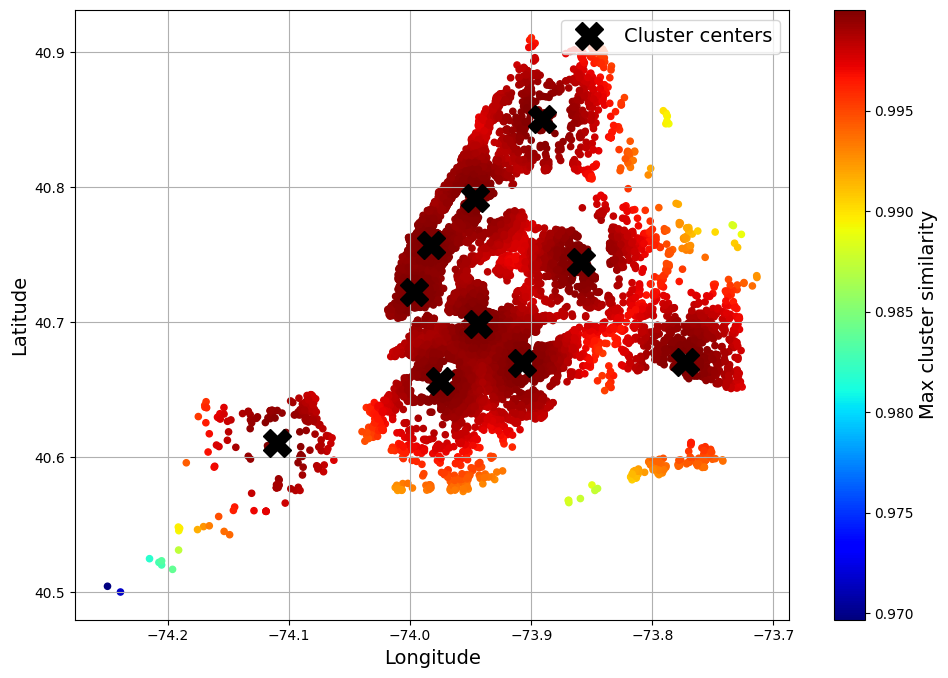

In [690]:
# extra code – this cell generates Figure 2–19

bnbs_renamed = nyc_bnbs.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "bedrooms": "Bedrooms",
    "price": "Price Per Night (USD)"})
bnbs_renamed["Max cluster similarity"] = similarities.max(axis=1)

bnbs_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

## Transformation Pipelines

In [691]:
from sklearn.pipeline import Pipeline 

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [692]:
from sklearn.pipeline import make_pipeline 

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [693]:
from sklearn import set_config

set_config(display = "diagram")

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [694]:
bnbs_num_prepped = num_pipeline.fit_transform(bnbs_num)
bnbs_num_prepped[:2].round(2)

array([[-1.  ,  2.76,  0.04, -0.51, -0.26, -0.23,  1.18, -0.28, -2.83,
        -0.35, -0.61, -0.38],
       [-0.21, -0.91,  0.04, -0.5 ,  0.03, -0.12,  0.3 , -0.23,  0.95,
         4.21, -0.61,  1.75]])

In [695]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [696]:
df_bnbs_num_prepared = pd.DataFrame(
    bnbs_num_prepped, columns=num_pipeline.get_feature_names_out(),
    index=bnbs_num.index)

In [697]:
df_bnbs_num_prepared.head(2)  # extra code

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,baths
9958,-0.996811,2.762893,0.042535,-0.511823,-0.255921,-0.225129,1.175542,-0.277312,-2.832547,-0.352910,-0.609301,-0.376347
7841,-0.211402,-0.905650,0.042535,-0.498331,0.026216,-0.115405,0.295918,-0.229779,0.947469,4.209502,-0.609301,1.748290


In [698]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [699]:
num_pipeline[1]

StandardScaler()

In [700]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [701]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [702]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [738]:
nyc_bnbs.drop('bedroom_cat', axis = 1, inplace = True)

In [739]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "bedrooms", "beds",
               "baths", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365",
               "number_of_reviews_ltm", "rating"]
cat_attribs = ["neighbourhood_group", "room_type", "license"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [740]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [741]:
bnbs_prepped = preprocessing.fit_transform(nyc_bnbs)

In [742]:
# extra code – shows that we can get a DataFrame out if we want
bnbs_prepped_fr = pd.DataFrame(
    bnbs_prepped,
    columns=preprocessing.get_feature_names_out(),
    index=nyc_bnbs.index)
bnbs_prepped_fr.head(2)

,pipeline-1__latitude,pipeline-1__longitude,pipeline-1__minimum_nights,pipeline-1__number_of_reviews,pipeline-1__reviews_per_month,pipeline-1__calculated_host_listings_count,pipeline-1__availability_365,pipeline-1__number_of_reviews_ltm,pipeline-1__rating,pipeline-1__bedrooms,...,pipeline-2__neighbourhood_group_Manhattan,pipeline-2__neighbourhood_group_Queens,pipeline-2__neighbourhood_group_Staten Island,pipeline-2__room_type_Entire home/apt,pipeline-2__room_type_Hotel room,pipeline-2__room_type_Private room,pipeline-2__room_type_Shared room,pipeline-2__license_Exempt,pipeline-2__license_Licensed,pipeline-2__license_No License
9958,-1.013199,2.815576,0.049947,-0.580744,-0.259903,-0.253012,1.175461,-0.311479,-2.902399,-0.317630,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7841,-0.223457,-0.925870,0.049947,-0.561539,0.203838,-0.075181,0.294493,-0.228412,0.955061,5.199117,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [743]:
from sklearn.preprocessing import FunctionTransformer


def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())


cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include = object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [744]:
bnbs_prepped = preprocessing.fit_transform(nyc_bnbs)
bnbs_prepped.shape

(15319, 32)

In [745]:
preprocessing.get_feature_names_out()

array(['geo__Cluster 0 similarity', 'geo__Cluster 1 similarity',
       'geo__Cluster 2 similarity', 'geo__Cluster 3 similarity',
       'geo__Cluster 4 similarity', 'geo__Cluster 5 similarity',
       'geo__Cluster 6 similarity', 'geo__Cluster 7 similarity',
       'geo__Cluster 8 similarity', 'geo__Cluster 9 similarity',
       'cat__neighbourhood_group_Bronx',
       'cat__neighbourhood_group_Brooklyn',
       'cat__neighbourhood_group_Manhattan',
       'cat__neighbourhood_group_Queens',
       'cat__neighbourhood_group_Staten Island',
       'cat__room_type_Entire home/apt', 'cat__room_type_Hotel room',
       'cat__room_type_Private room', 'cat__room_type_Shared room',
       'cat__license_Exempt', 'cat__license_Licensed',
       'cat__license_No License', 'remainder__minimum_nights',
       'remainder__number_of_reviews', 'remainder__reviews_per_month',
       'remainder__calculated_host_listings_count',
       'remainder__availability_365', 'remainder__number_of_reviews_ltm',
 

## Select and Train a Model

### Training and Evaluating on the Training Set

In [746]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(nyc_bnbs, nyc_bnbs_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x2bf759110>)])),
                ('linearregression', LinearRegression())])

In [747]:
# Trying the full pre-processing on a few training instances

bnb_predictions = lin_reg.predict(nyc_bnbs)
bnb_predictions[:5].round(2)  # -2 = rounded to the nearest hundred

array([117.94, 391.81, 286.64, 286.97,  90.17])

In [748]:
# comparing against the actual values 
nyc_bnbs_labels.iloc[:5].values


array([253.,  35., 135., 325., 119.])

In [749]:
# extra code – computes the error ratios discussed in the book
error_ratios = bnb_predictions[:5].round(-2) / nyc_bnbs_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-60.5%, 1042.9%, 122.2%, -7.7%, -16.0%


In [750]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(nyc_bnbs_labels, bnb_predictions,
                              squared=False)
lin_rmse

1168.9690245790855

In [751]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(nyc_bnbs, nyc_bnbs_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x2bf759110>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [752]:
bnb_predictions = tree_reg.predict(nyc_bnbs)
tree_rmse = mean_squared_error(nyc_bnbs_labels, bnb_predictions,
                              squared=False)
tree_rmse

0.11426146544571335

In [753]:
# Better Evaluation Using Cross-Validation

from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, nyc_bnbs, nyc_bnbs_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [754]:
pd.Series(tree_rmses).describe()

count      10.000000
mean      678.932084
std      1039.937876
min       160.988145
25%       315.641594
50%       385.621750
75%       416.540936
max      3626.949519
dtype: float64

In [755]:
# extra code – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, nyc_bnbs, nyc_bnbs_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count      10.000000
mean      569.480485
std      1077.986428
min       139.829840
25%       146.031134
50%       252.706784
75%       303.296874
max      3628.034518
dtype: float64

In [756]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, nyc_bnbs, nyc_bnbs_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [757]:
pd.Series(forest_rmses).describe()

count      10.000000
mean      661.796641
std      1061.741233
min       122.983717
25%       171.037107
50%       329.987070
75%       453.503074
max      3626.989676
dtype: float64

In [758]:
# Let's compare this RMSE measured using cross-validation (the "validation error") with
#  the RMSE measured on the training set (the "training error"):

forest_reg.fit(nyc_bnbs, nyc_bnbs_labels)
bnb_predictions = forest_reg.predict(nyc_bnbs)
forest_rmse = mean_squared_error(nyc_bnbs_labels, bnb_predictions,
                                 squared=False)
forest_rmse

366.17773278410596

# Fine-Tuning the Model

## Grid Search

In [759]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(nyc_bnbs, nyc_bnbs_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('geo',
                                                                         ClusterSimilarity(random_state=42),
                                                                         ['latitude',
                                                                          'longitude']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequ...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x2bf759110>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [760]:
# List of hyper-parameters available for tuning:

print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'prepr

In [761]:
# Best hyper-parameter combo found:

grid_search.best_params_

{'preprocessing__geo__n_clusters': 8, 'random_forest__max_features': 4}

In [762]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('geo',
                                                  ClusterSimilarity(n_clusters=8,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x17f507f10>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=4, random_state=42))])

In [763]:
# scoring of each hyperparameter combo tested during grid search process

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
3,8,4,336,1996,267,866
4,8,6,301,1996,303,866
5,8,8,339,1996,274,870
6,10,4,302,1996,321,873
7,10,6,354,1995,273,874


## Randomized Search

In [764]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [765]:

# Trying n_iter * cv  = 30 random combinations of hyper-parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(nyc_bnbs, nyc_bnbs_labels)



RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('geo',
                                                                               ClusterSimilarity(random_state=42),
                                                                               ['latitude',
                                                                                'longitude']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x2bf759110>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2bf794fd0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17f47e790>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [766]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
9,4,2,289,1995,307,864
2,23,8,432,1995,269,899
4,13,5,445,1995,269,903
3,21,12,462,1996,292,916
7,26,13,486,1995,277,920


# Analyzing the Best Model

In [767]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.16, 0.08, 0.13, 0.17, 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.05, 0.08, 0.03, 0.1 , 0.04,
       0.07, 0.01, 0.01, 0.01])

In [768]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.1721306972422709, 'geo__Cluster 3 similarity'),
 (0.16208037958783564, 'geo__Cluster 0 similarity'),
 (0.1288125346206131, 'geo__Cluster 2 similarity'),
 (0.10228269198522738, 'remainder__availability_365'),
 (0.08471867989235732, 'remainder__reviews_per_month'),
 (0.0792064424158003, 'geo__Cluster 1 similarity'),
 (0.07363125317232146, 'remainder__rating'),
 (0.05260158994936522, 'remainder__number_of_reviews'),
 (0.03866852116967214, 'remainder__number_of_reviews_ltm'),
 (0.02714074224116063, 'remainder__calculated_host_listings_count'),
 (0.01269751577688937, 'remainder__bedrooms'),
 (0.01204327914901603, 'remainder__baths'),
 (0.010780887302122693, 'cat__room_type_Private room'),
 (0.0073380137444148475, 'cat__neighbourhood_group_Brooklyn'),
 (0.006777551812038203, 'remainder__beds'),
 (0.005727029832699332, 'remainder__minimum_nights'),
 (0.005386640206275125, 'cat__neighbourhood_group_Queens'),
 (0.005235644159914752, 'cat__room_type_Entire home/apt'),
 (0.0045201996593561755

# Evaluating System on Testing Dataset

In [769]:
X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

final_predictions = final_model.predict(X_test)



In [770]:
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

641.3851697286694


In [771]:
# Computing 95% C.I. for test RMSE:

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

/var/folders/z6/mhv044k52r38pf74f9w6gkjc0000gn/T/ipykernel_78629/4101885391.py:7: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,


array([          nan, 1045.91095071])

# Model Persistence using Joblib

In [772]:
import joblib

joblib.dump(final_model, "airbnb_nyc_model.pkl")

['airbnb_nyc_model.pkl']

In [773]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("airbnb_nyc_model.pkl")

new_data = nyc_bnbs.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [774]:
predictions

array([199.15,  71.89, 166.58, 378.12, 121.96])